In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Agrupamos un nuevo DF por AÑO sumando el total de de unidades y de venta, ordenandolo primero por año
dfYearSales = (df.groupby(['YEAR'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].
    sum().reset_index().sort_values(by=['YEAR'], ascending = [True]))

#Sacaremos 2 valores nuevos que sera el % de crecimiento o de decrecimiento tanto por Valor y Unidades de ventas que se han tenido
dfYearSales["UNITS_GROWTH"] = dfYearSales["TOTAL_UNIT_SALES"].pct_change() * 100
dfYearSales["VALUE_GROWTH"] = dfYearSales["TOTAL_VALUE_SALES"].pct_change() * 100

#Para que exista un buen control se llena con '0' en el caso del primer regitro de año que se tiene para que se pueda agregar como valor en las graficas
dfYearSales["UNITS_GROWTH"] = dfYearSales["UNITS_GROWTH"].fillna(0)
dfYearSales["VALUE_GROWTH"] = dfYearSales["VALUE_GROWTH"].fillna(0)

#Cambiamos el valor del Año a un tipo string para poder ordenarlo en las graficas correctamente año por año
dfYearSales["YEAR"] = dfYearSales["YEAR"].astype(str)

#Filtramos solo los años 2022 y 2023 ya que el 2021 tiene una gran falta de valores de registros de 11 mes
dfYearSales = dfYearSales[dfYearSales['YEAR'].isin(['2022','2023'])]

#De el crecimiento del año 2022 como no tiene un valor de comparacion referente a otro solo se muestra como 0 ya que no tiene otro año contra que comprarse
dfYearSales.loc[dfYearSales['YEAR'] == '2022', 'UNITS_GROWTH'] = 0
dfYearSales.loc[dfYearSales['YEAR'] == '2022', 'VALUE_GROWTH'] = 0

dfYearSales

,YEAR,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,UNITS_GROWTH,VALUE_GROWTH
1,2022,1548.409,29516.632,0.000000,0.000000
2,2023,1056.943,29836.574,-31.740064,1.083938


### Venta de Unidades y Total Valor por Año

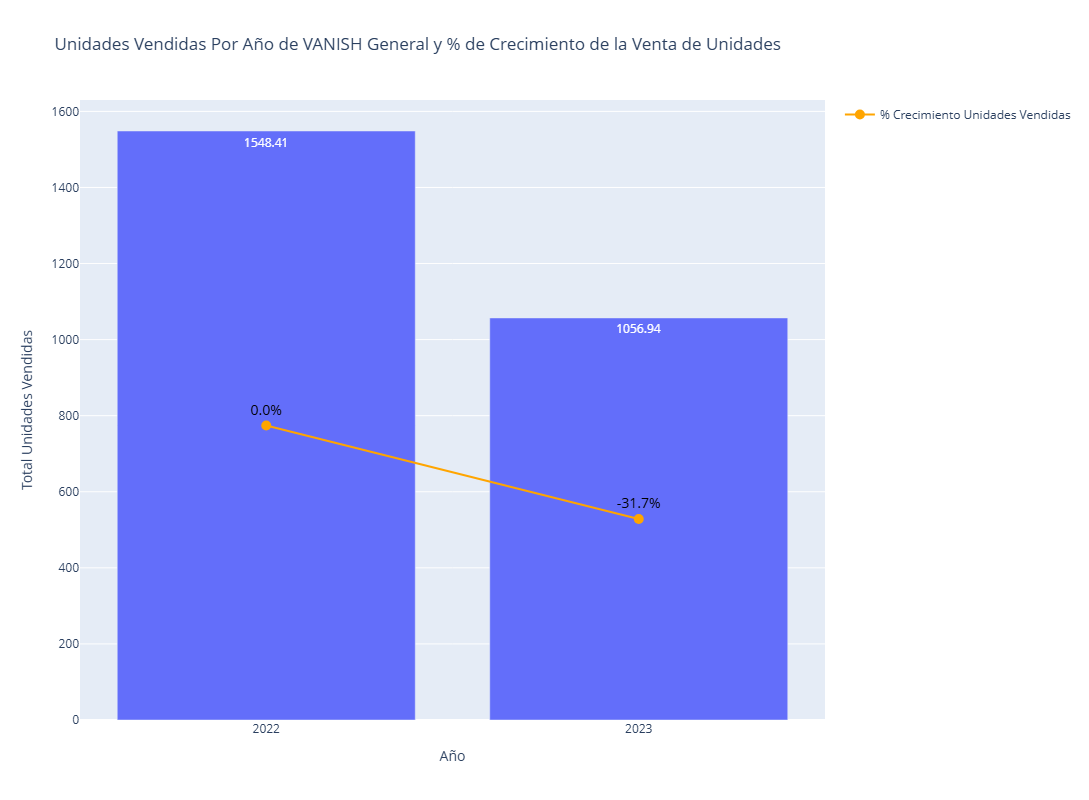

In [7]:
#Agregamos un grafico de barras para representar el total de UNIDADES vendidas por AÑO y ver si tuvo un crecimiento el total de UNIDADES vendidas
fig = px.bar(
    dfYearSales,
    x="YEAR",
    y="TOTAL_UNIT_SALES",
    text=dfYearSales["TOTAL_UNIT_SALES"].round(2),
    title="Unidades Vendidas Por Año de VANISH General y % de Crecimiento de la Venta de Unidades",
    labels={
        "YEAR": "Año"
    }
)

#EL % de CRECIMIENTO o DECRECIMIENTO lo podemos observar con una pequeña grafica de lineas agregada a las barras que tenemos ya en nuestro grafico
fig.add_scatter(
    x=dfYearSales["YEAR"],
    y=dfYearSales["TOTAL_UNIT_SALES"] / 2,
    mode="lines+markers+text",
    text=dfYearSales["UNITS_GROWTH"].round(1).astype(str) + "%",
    textposition="middle center",
    marker=dict(size=10, color="orange"),
    line=dict(color="orange", width=2, dash="solid"),
    name="% Crecimiento Unidades Vendidas"
)

fig.update_traces(selector=dict(type="scatter"),
    textfont=dict(size=14, color="black"),
    textposition="top center")

fig.update_layout(
    yaxis_title="Total Unidades Vendidas",
    legend=dict(title=""),
    height=800
)

fig.show()

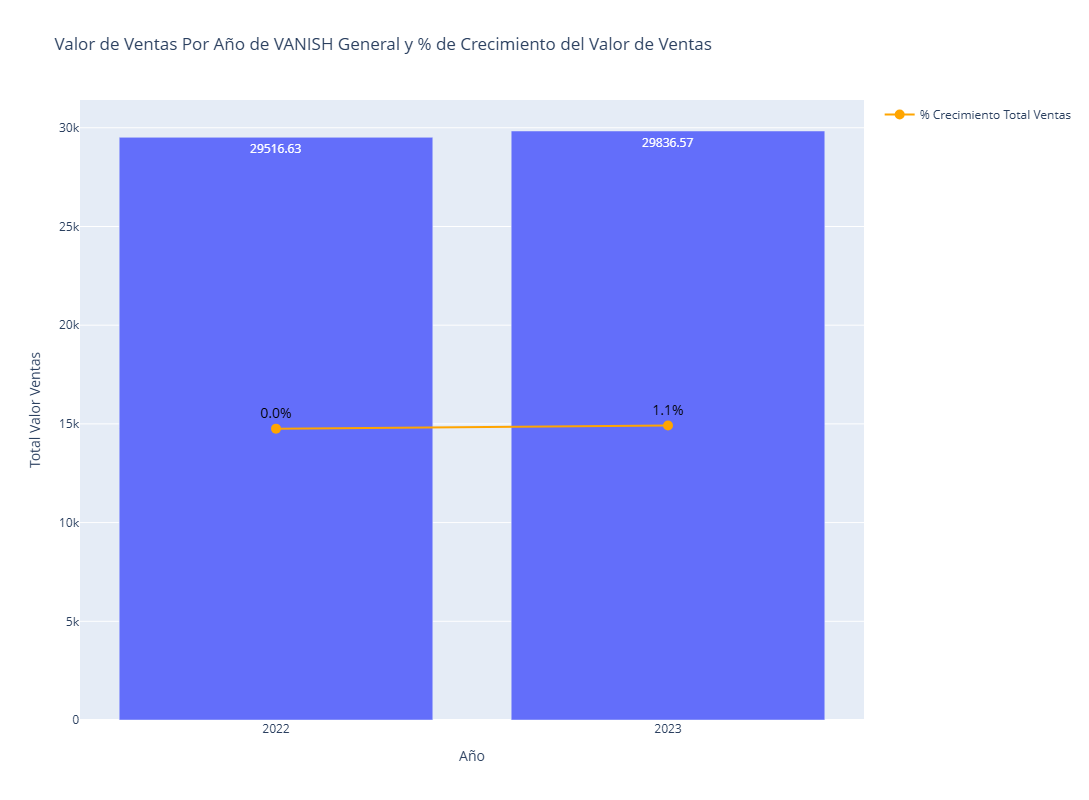

In [9]:
#Agregamos un grafico de barras para representar el TOTAL de VALOR de vetass por AÑO y ver si tuvo un crecimiento el total de VALOR de ventas
fig = px.bar(
    dfYearSales,
    x="YEAR",
    y="TOTAL_VALUE_SALES",
    text=dfYearSales["TOTAL_VALUE_SALES"].round(2),
    title="Valor de Ventas Por Año de VANISH General y % de Crecimiento del Valor de Ventas",
    labels={
        "YEAR": "Año"
    }
)

#EL % de CRECIMIENTO o DECRECIMIENTO lo podemos observar con una pequeña grafica ede lineas agregada a las barras que tenemos ya en nuestro grafico
fig.add_scatter(
    x=dfYearSales["YEAR"],
    y=dfYearSales["TOTAL_VALUE_SALES"] / 2,  
    mode="lines+markers+text",
    text=dfYearSales["VALUE_GROWTH"].round(1).astype(str) + "%",
    textposition="middle center",
    marker=dict(size=10, color="orange"),
    line=dict(color="orange", width=2, dash="solid"),
    name="% Crecimiento Total Ventas"
)

fig.update_traces(selector=dict(type="scatter"),
    textfont=dict(size=14, color="black"),
    textposition="top center")

fig.update_layout(
    yaxis_title="Total Valor Ventas",
    legend=dict(title=""),
    height=800
)

fig.show()